### Isak Andersson AI23 - Maskininlärning
# Laboration

#### Uppgift 2
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ratings = pd.read_csv("../data/ml-latest/ratings.csv")
tags = pd.read_csv("../data/ml-latest/tags.csv")
movies = pd.read_csv("../data/ml-latest/movies.csv")

In [2]:
display(ratings.shape), display(tags.shape), display(movies.shape)
display(ratings.head(1)), display(tags.head(1)), display(movies.head(1))

(33832162, 4)

(2328315, 4)

(86537, 3)

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739


,userId,movieId,tag,timestamp
0,10,260,good vs evil,1430666558


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


(None, None, None)

In [3]:
movies['genres'] = movies['genres'].str.split('|')
movies['genres'] = movies['genres'].apply(lambda genres: [genre.replace('Film-Noir', 'FilmNoir') for genre in genres])
movies['genres'] = movies['genres'].apply(lambda genres: [genre.replace('(no genres listed)', 'None') for genre in genres])
movies['genres'] = movies['genres'].apply(lambda genres: [genre.replace('Sci-Fi', 'SciFi') for genre in genres])

In [4]:
genres = set()
for genre in movies['genres']:
    genres.update(genre)
    
genres = list(genres)
genres

['War',
 'SciFi',
 'Crime',
 'Mystery',
 'FilmNoir',
 'Fantasy',
 'Comedy',
 'Animation',
 'Documentary',
 'IMAX',
 'Children',
 'Musical',
 'Drama',
 'Horror',
 'None',
 'Romance',
 'Adventure',
 'Action',
 'Thriller',
 'Western']

<Axes: xlabel='genres'>

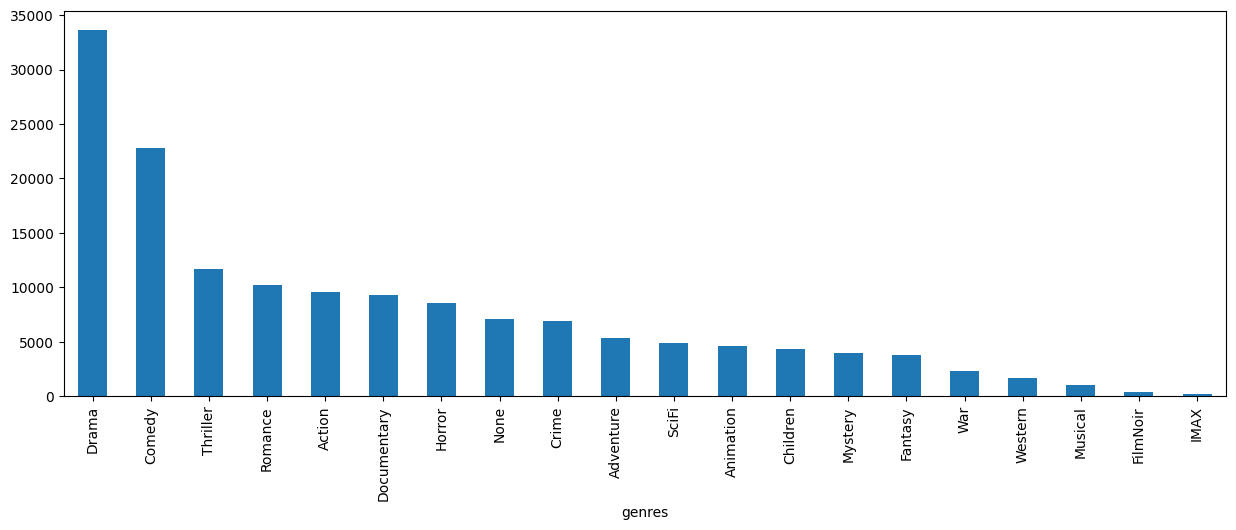

In [5]:
movies.explode('genres')['genres'].value_counts().plot(kind='bar', figsize=(15, 5))

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
# vectorizer = CountVectorizer(binary=True)

movie_matrix = vectorizer.fit_transform(movies['genres'].apply(lambda x: ' '.join(x)))
movie_df = pd.DataFrame(movie_matrix.toarray(), columns=vectorizer.get_feature_names_out())
movie_df

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,filmnoir,horror,imax,musical,mystery,romance,scifi,thriller,war,western
0,0.000000,0.458366,0.477193,0.482934,0.282576,0.000000,0.0,0.000000,0.499112,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.000000,0.550836,0.000000,0.580360,0.000000,0.000000,0.0,0.000000,0.599801,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.596203,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.802834,0.0,0.000000,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.533940,0.000000,0.0,0.444927,0.000000,0.0,0.000000,0.0,0.0,0.0,0.718992,0.0,0.000000,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86532,0.854882,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.518822,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
86533,0.695110,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.718903,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
86534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
86535,0.000000,0.000000,0.000000,0.000000,0.000000,0.761347,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.648345,0.0,0.0


In [10]:
from sklearn.metrics.pairwise import cosine_similarity

random_df = movie_df.sample(100)

cosine_sim = cosine_similarity(random_df, random_df)
cosine_sim_df = pd.DataFrame(cosine_sim)
cosine_sim_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.435181,0.000000,0.428279,0.000000,0.000000,0.474970,0.731031,0.000000,0.0,...,0.000000,0.243922,0.000000,0.0,0.000000,0.381781,0.000000,0.266623,0.0,0.0
1,0.435181,1.000000,0.480815,0.440795,0.172275,0.135830,0.916227,0.595297,0.000000,0.0,...,0.434990,0.340951,0.480815,0.0,0.480815,0.283065,0.400658,0.372682,0.0,0.0
2,0.000000,0.480815,1.000000,0.000000,0.000000,0.000000,0.524777,0.000000,0.000000,0.0,...,0.533940,0.000000,1.000000,0.0,1.000000,0.588719,0.000000,0.000000,0.0,0.0
3,0.428279,0.440795,0.000000,1.000000,0.098773,0.077877,0.380646,0.585856,0.180024,0.0,...,0.369105,0.195482,0.000000,0.0,0.000000,0.305963,0.229714,0.213674,0.0,0.0
4,0.000000,0.172275,0.000000,0.098773,1.000000,0.788447,0.000000,0.000000,0.000000,0.0,...,0.191310,0.000000,0.000000,0.0,0.000000,0.000000,0.429980,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.381781,0.283065,0.588719,0.305963,0.000000,0.000000,0.308946,0.522250,0.000000,0.0,...,0.314340,0.000000,0.588719,0.0,0.588719,1.000000,0.000000,0.000000,0.0,0.0
96,0.000000,0.400658,0.000000,0.229714,0.429980,0.339016,0.000000,0.000000,0.000000,0.0,...,0.444927,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0
97,0.266623,0.372682,0.000000,0.213674,0.000000,0.000000,0.406757,0.364722,0.000000,0.0,...,0.000000,0.667178,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
